In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Load dataset
data = sns.load_dataset("titanic")

# Show first few rows
print(data.head())


# Select relevant columns
df = data[['survived', 'sex', 'age', 'fare', 'class', 'embarked']]

# Drop missing values
df = df.dropna()

# Convert categorical columns to numeric (Label Encoding)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Split features and target
X = df[['sex', 'age', 'fare', 'class', 'embarked']]
y = df['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Accuracy: 0.7412587412587412

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        80
           1       0.74      0.63      0.68        63

 

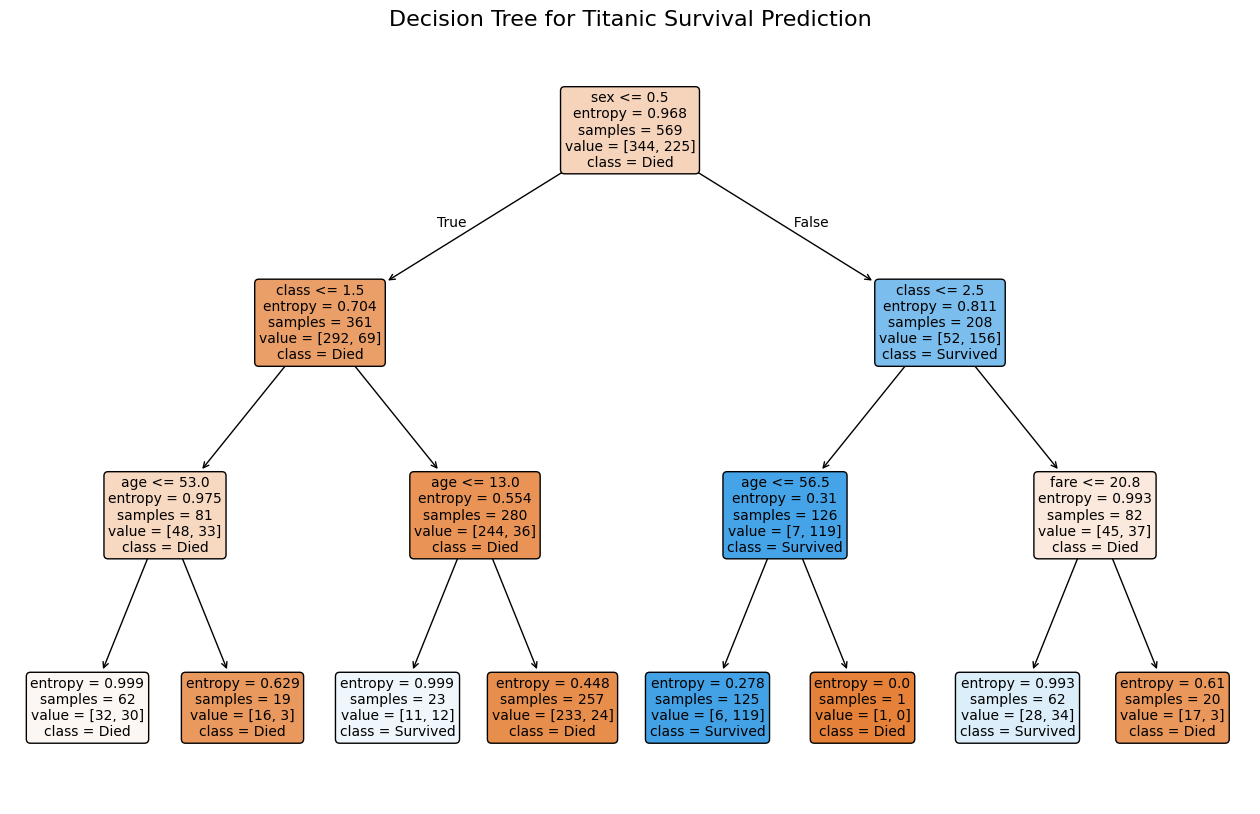

In [2]:
plt.figure(figsize=(16,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Titanic Survival Prediction", fontsize=16)
plt.show()


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

X, y = load_iris(return_X_y=True)

# Gini-based Tree
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X, y)

# Entropy-based Tree
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree_entropy.fit(X, y)

print("Tree using GINI:")
print(export_text(tree_gini, feature_names=load_iris().feature_names))

print("\nTree using ENTROPY:")
print(export_text(tree_entropy, feature_names=load_iris().feature_names))


Tree using GINI:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2


Tree using ENTROPY:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [4]:
# Best Splitter
tree_best = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)
tree_best.fit(X, y)

# Random Splitter
tree_random = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3, random_state=0)
tree_random.fit(X, y)

print("Tree using BEST splitter:")
print(export_text(tree_best, feature_names=load_iris().feature_names))

print("\nTree using RANDOM splitter:")
print(export_text(tree_random, feature_names=load_iris().feature_names))


Tree using BEST splitter:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2


Tree using RANDOM splitter:
|--- petal length (cm) <= 2.21
|   |--- class: 0
|--- petal length (cm) >  2.21
|   |--- petal length (cm) <= 5.03
|   |   |--- petal width (cm) <= 1.72
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.72
|   |   |   |--- class: 2
|   |--- petal length (cm) >  5.03
|   |   |--- petal length (cm) <= 5.84
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.84
|   |   |   |--- class: 2



In [5]:
# Shallow Tree
tree_depth2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
tree_depth2.fit(X, y)

# Deeper Tree
tree_depth5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree_depth5.fit(X, y)

print("Tree with max_depth=2:")
print(export_text(tree_depth2, feature_names=load_iris().feature_names))

print("\nTree with max_depth=5:")
print(export_text(tree_depth5, feature_names=load_iris().feature_names))


Tree with max_depth=2:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2


Tree with max_depth=5:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |  

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

X, y = load_iris(return_X_y=True)

model = DecisionTreeClassifier(
    criterion='entropy',    # Use information gain
    splitter='best',        # Use best possible split
    max_depth=3,            # Limit to 3 levels
    random_state=42
)

model.fit(X, y)
print(export_text(model, feature_names=load_iris().feature_names))


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [7]:
# Penguines Dataset

Penguins Dataset Head:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Penguins Accuracy: 1.0

Penguins Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        6

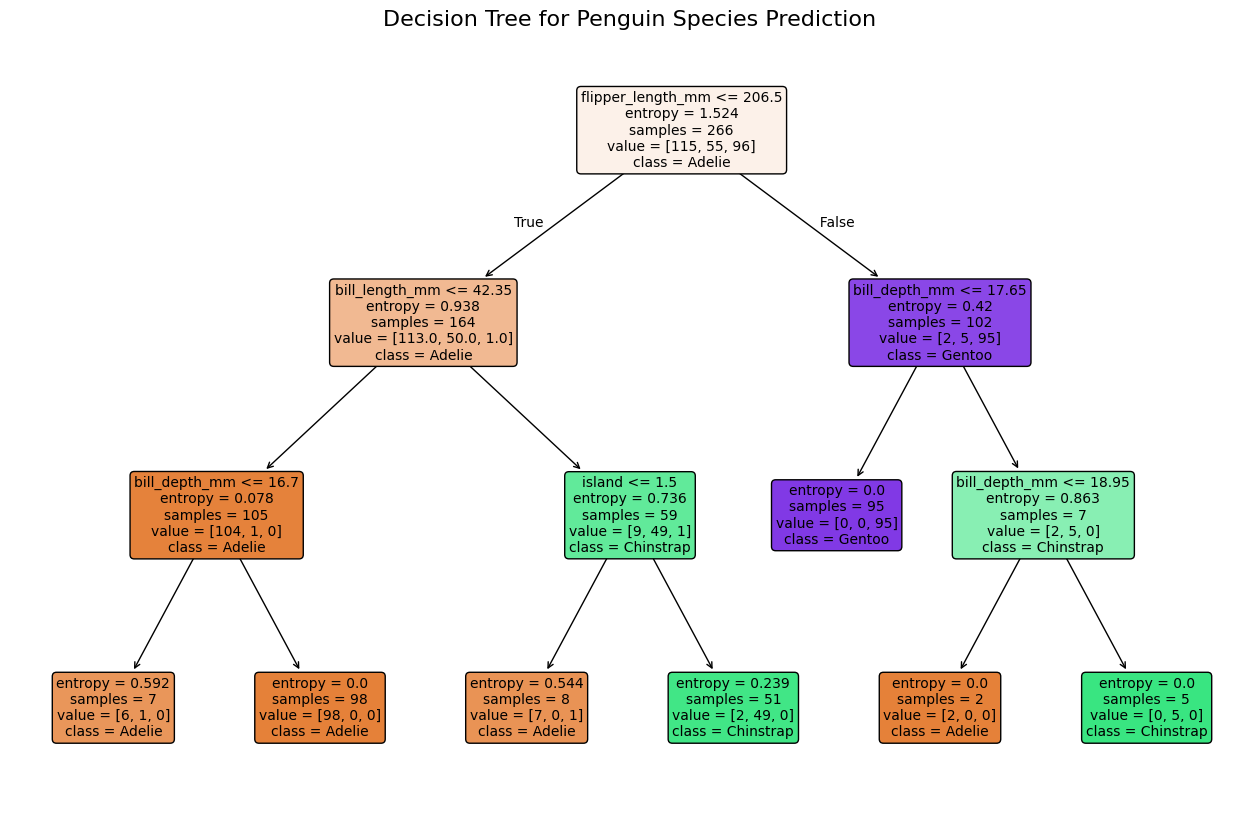

In [11]:
# ==================== Penguins Dataset ====================
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = sns.load_dataset("penguins")

# Show first few rows
print("Penguins Dataset Head:")
print(data.head())

# Select relevant columns
df = data[['species', 'sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island']]

# Drop missing values
df = df.dropna()

# Convert categorical columns to numeric (Label Encoding)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['island'] = df['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# Split features and target
X = df[['sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island']].values
y = df['species'].values
feature_names = ['sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nPenguins Accuracy:", accuracy_score(y_test, y_pred))
print("\nPenguins Classification Report:\n", classification_report(y_test, y_pred))
print("\nPenguins Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot tree
plt.figure(figsize=(16,10))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=["Adelie", "Chinstrap", "Gentoo"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Penguin Species Prediction", fontsize=16)
plt.show()

In [12]:
# ==================== Penguins Dataset (Decision Tree Variations) ====================

# Gini-based Tree
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X, y)

# Entropy-based Tree
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree_entropy.fit(X, y)

print("\nTree using GINI:")
print(export_text(tree_gini, feature_names=feature_names))

print("\nTree using ENTROPY:")
print(export_text(tree_entropy, feature_names=feature_names))

# Best Splitter
tree_best = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)
tree_best.fit(X, y)

# Random Splitter
tree_random = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3, random_state=0)
tree_random.fit(X, y)

print("\nTree using BEST splitter:")
print(export_text(tree_best, feature_names=feature_names))

print("\nTree using RANDOM splitter:")
print(export_text(tree_random, feature_names=feature_names))

# Shallow Tree (max_depth=2)
tree_depth2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
tree_depth2.fit(X, y)

# Deeper Tree (max_depth=5)
tree_depth5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree_depth5.fit(X, y)

print("\nTree with max_depth=2:")
print(export_text(tree_depth2, feature_names=feature_names))

print("\nTree with max_depth=5:")
print(export_text(tree_depth5, feature_names=feature_names))

# Final model with entropy and best splitter
model_final = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=3,
    random_state=42
)
model_final.fit(X, y)

print("\nFinal Tree (Entropy + Best Splitter + max_depth=3):")
print(export_text(model_final, feature_names=feature_names))


Tree using GINI:
|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 43.35
|   |   |--- bill_length_mm <= 42.35
|   |   |   |--- class: 0
|   |   |--- bill_length_mm >  42.35
|   |   |   |--- class: 0
|   |--- bill_length_mm >  43.35
|   |   |--- island <= 1.50
|   |   |   |--- class: 0
|   |   |--- island >  1.50
|   |   |   |--- class: 1
|--- flipper_length_mm >  206.50
|   |--- bill_depth_mm <= 17.65
|   |   |--- class: 2
|   |--- bill_depth_mm >  17.65
|   |   |--- bill_length_mm <= 46.55
|   |   |   |--- class: 0
|   |   |--- bill_length_mm >  46.55
|   |   |   |--- class: 1


Tree using ENTROPY:
|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 43.35
|   |   |--- bill_length_mm <= 42.35
|   |   |   |--- class: 0
|   |   |--- bill_length_mm >  42.35
|   |   |   |--- class: 0
|   |--- bill_length_mm >  43.35
|   |   |--- island <= 1.50
|   |   |   |--- class: 0
|   |   |--- island >  1.50
|   |   |   |--- class: 1
|--- flipper_length_mm >  206.50
|   |--- bill_de

In [13]:
# Digits Dataset


Digits Dataset Accuracy: 0.4861111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.00      0.00      0.00        28
           2       0.50      0.55      0.52        33
           3       0.64      0.79      0.71        34
           4       0.00      0.00      0.00        46
           5       0.50      0.02      0.04        47
           6       0.64      0.91      0.75        35
           7       0.38      0.47      0.42        34
           8       0.28      0.80      0.41        30
           9       0.38      0.68      0.49        40

    accuracy                           0.49       360
   macro avg       0.43      0.51      0.43       360
weighted avg       0.42      0.49      0.41       360


Confusion Matrix:
 [[30  0  0  0  0  0  0  0  2  1]
 [ 0  0 11  3  0  0  2  1  7  4]
 [ 0  0 18  1  0  1  3  2  8  0]
 [ 0  0  2 27  0  0  0  0  4  1]
 [ 0  0  0  0  0  0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


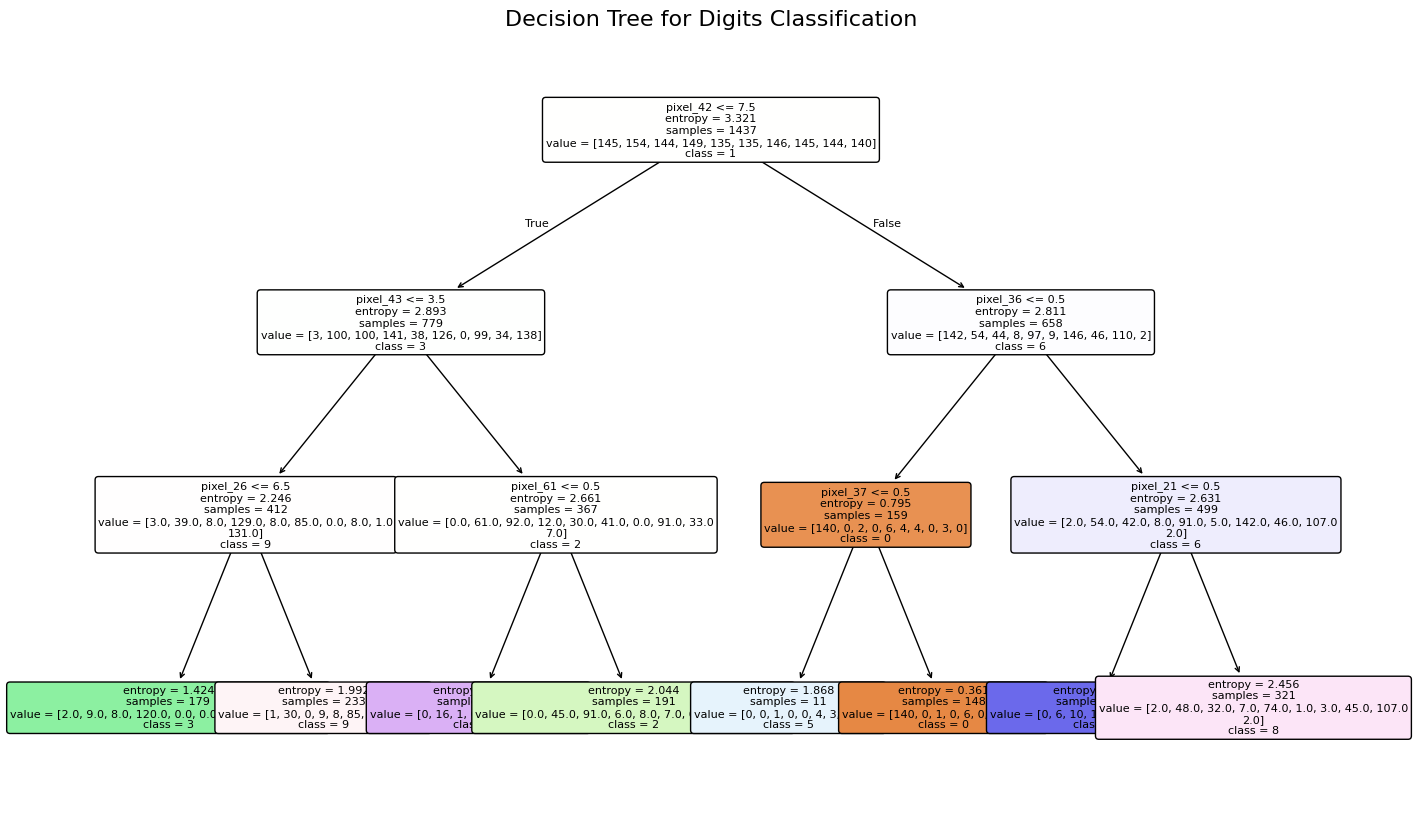

In [14]:
# ==================== Digits Dataset (Decision Trees) ====================
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target
feature_names = [f'pixel_{i}' for i in range(X.shape[1])]  # 64 pixel features

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nDigits Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot tree
plt.figure(figsize=(16,10))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=[str(i) for i in digits.target_names],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Digits Classification", fontsize=16)
plt.show()

In [15]:
# ==================== Digits Dataset (Decision Tree Variations) ====================

# Gini-based Tree
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X, y)

# Entropy-based Tree
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree_entropy.fit(X, y)

print("\nTree using GINI:")
print(export_text(tree_gini, feature_names=feature_names))

print("\nTree using ENTROPY:")
print(export_text(tree_entropy, feature_names=feature_names))

# Best Splitter
tree_best = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=0)
tree_best.fit(X, y)

# Random Splitter
tree_random = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3, random_state=0)
tree_random.fit(X, y)

print("\nTree using BEST splitter:")
print(export_text(tree_best, feature_names=feature_names))

print("\nTree using RANDOM splitter:")
print(export_text(tree_random, feature_names=feature_names))

# Shallow Tree (max_depth=2)
tree_depth2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
tree_depth2.fit(X, y)

# Deeper Tree (max_depth=5)
tree_depth5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree_depth5.fit(X, y)

print("\nTree with max_depth=2:")
print(export_text(tree_depth2, feature_names=feature_names))

print("\nTree with max_depth=5:")
print(export_text(tree_depth5, feature_names=feature_names))

# Final model with entropy and best splitter
model_final = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=3,
    random_state=42
)
model_final.fit(X, y)

print("\nFinal Tree (Entropy + Best Splitter + max_depth=3):")
print(export_text(model_final, feature_names=feature_names))


Tree using GINI:
|--- pixel_36 <= 0.50
|   |--- pixel_28 <= 2.50
|   |   |--- pixel_21 <= 0.50
|   |   |   |--- class: 5
|   |   |--- pixel_21 >  0.50
|   |   |   |--- class: 0
|   |--- pixel_28 >  2.50
|   |   |--- pixel_21 <= 6.50
|   |   |   |--- class: 5
|   |   |--- pixel_21 >  6.50
|   |   |   |--- class: 9
|--- pixel_36 >  0.50
|   |--- pixel_21 <= 0.50
|   |   |--- pixel_42 <= 8.50
|   |   |   |--- class: 5
|   |   |--- pixel_42 >  8.50
|   |   |   |--- class: 6
|   |--- pixel_21 >  0.50
|   |   |--- pixel_60 <= 7.50
|   |   |   |--- class: 7
|   |   |--- pixel_60 >  7.50
|   |   |   |--- class: 3


Tree using ENTROPY:
|--- pixel_42 <= 7.50
|   |--- pixel_26 <= 8.50
|   |   |--- pixel_43 <= 2.50
|   |   |   |--- class: 3
|   |   |--- pixel_43 >  2.50
|   |   |   |--- class: 2
|   |--- pixel_26 >  8.50
|   |   |--- pixel_21 <= 3.50
|   |   |   |--- class: 5
|   |   |--- pixel_21 >  3.50
|   |   |   |--- class: 9
|--- pixel_42 >  7.50
|   |--- pixel_36 <= 0.50
|   |   |--- pixel